# Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [2]:
df=pd.read_csv("titanic_train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.shape

(891, 12)

The dataset is having 891 rows and 12 columns

In [4]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age and cabin columns are having null values

### Since Cabin is having nulls more than 50% of the total observations,so we will drop this columns and in age column we will fill nan with appropriate values

In [5]:
df=df.drop(columns=['Cabin'],axis=1)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


Now dataset is having 11 columns

In [6]:
df['Age']=df['Age'].fillna(df['Age'].mean())

Replacing age column NAn with age number which is maximum in count(mode methd)

In [7]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

Embarked columns Nan is filled with mode method

In [8]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Now our dataset is having no null values

In [9]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [10]:
df.Ticket.unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

### Removing Columns which are not contributing to target variable

In [11]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [12]:
df=df.drop(columns=['PassengerId','Name','Ticket'])
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


We have dropped these columns as these are ordinally normal distributed

# Encoding Categorical columns

## LabelEncoding

In [13]:
from sklearn.preprocessing import LabelEncoder
cols=['Sex','Embarked']
le=LabelEncoder()
for col in cols:
    df[col]=le.fit_transform(df[col])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


# EDA

### Visualisation of Data(categorical columns)

0    549
1    342
Name: Survived, dtype: int64


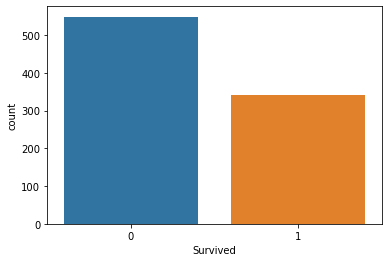

In [14]:
ax=sns.countplot(x='Survived',data=df)
print(df['Survived'].value_counts())

3    491
1    216
2    184
Name: Pclass, dtype: int64


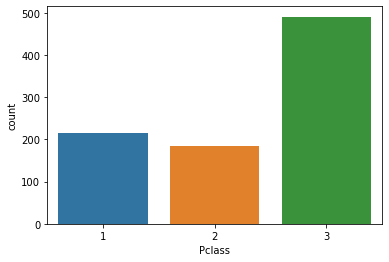

In [15]:
ax=sns.countplot(x='Pclass',data=df)
print(df['Pclass'].value_counts())

1    577
0    314
Name: Sex, dtype: int64


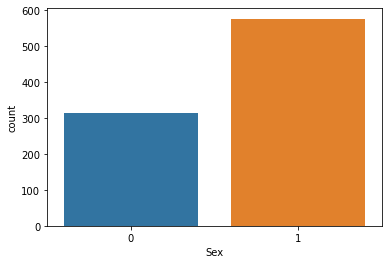

In [16]:
ax=sns.countplot(x='Sex',data=df)
print(df['Sex'].value_counts())

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


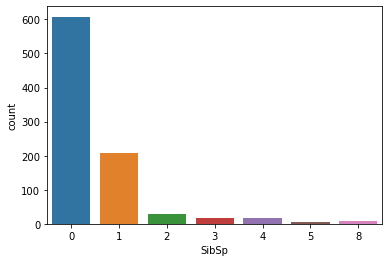

In [17]:
ax=sns.countplot(x='SibSp',data=df)
print(df['SibSp'].value_counts())

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


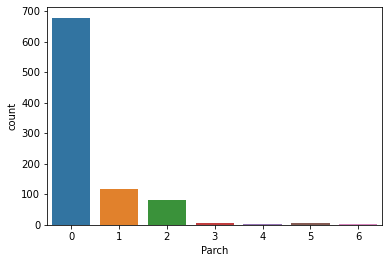

In [18]:
ax=sns.countplot(x='Parch',data=df)
print(df['Parch'].value_counts())

2    646
0    168
1     77
Name: Embarked, dtype: int64


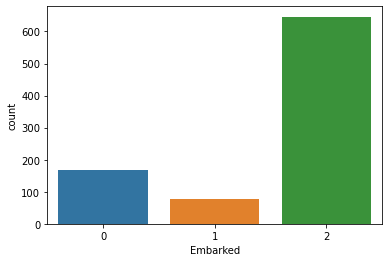

In [19]:
ax=sns.countplot(x='Embarked',data=df)
print(df['Embarked'].value_counts())

### Visualisation of Data(continous columns)


<AxesSubplot:xlabel='Age', ylabel='Density'>

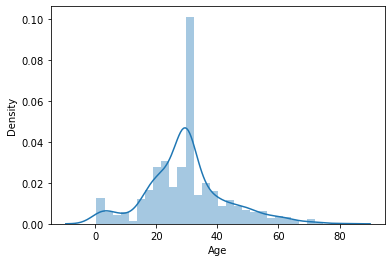

In [20]:
sns.distplot(df['Age'])

<AxesSubplot:xlabel='Fare', ylabel='Density'>

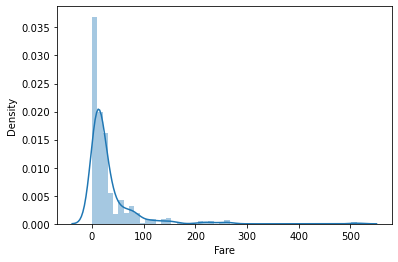

In [21]:
sns.distplot(df['Fare'])

From above observations we cal conclude that data are skewd

# Checking the correaltion with target variable and between features


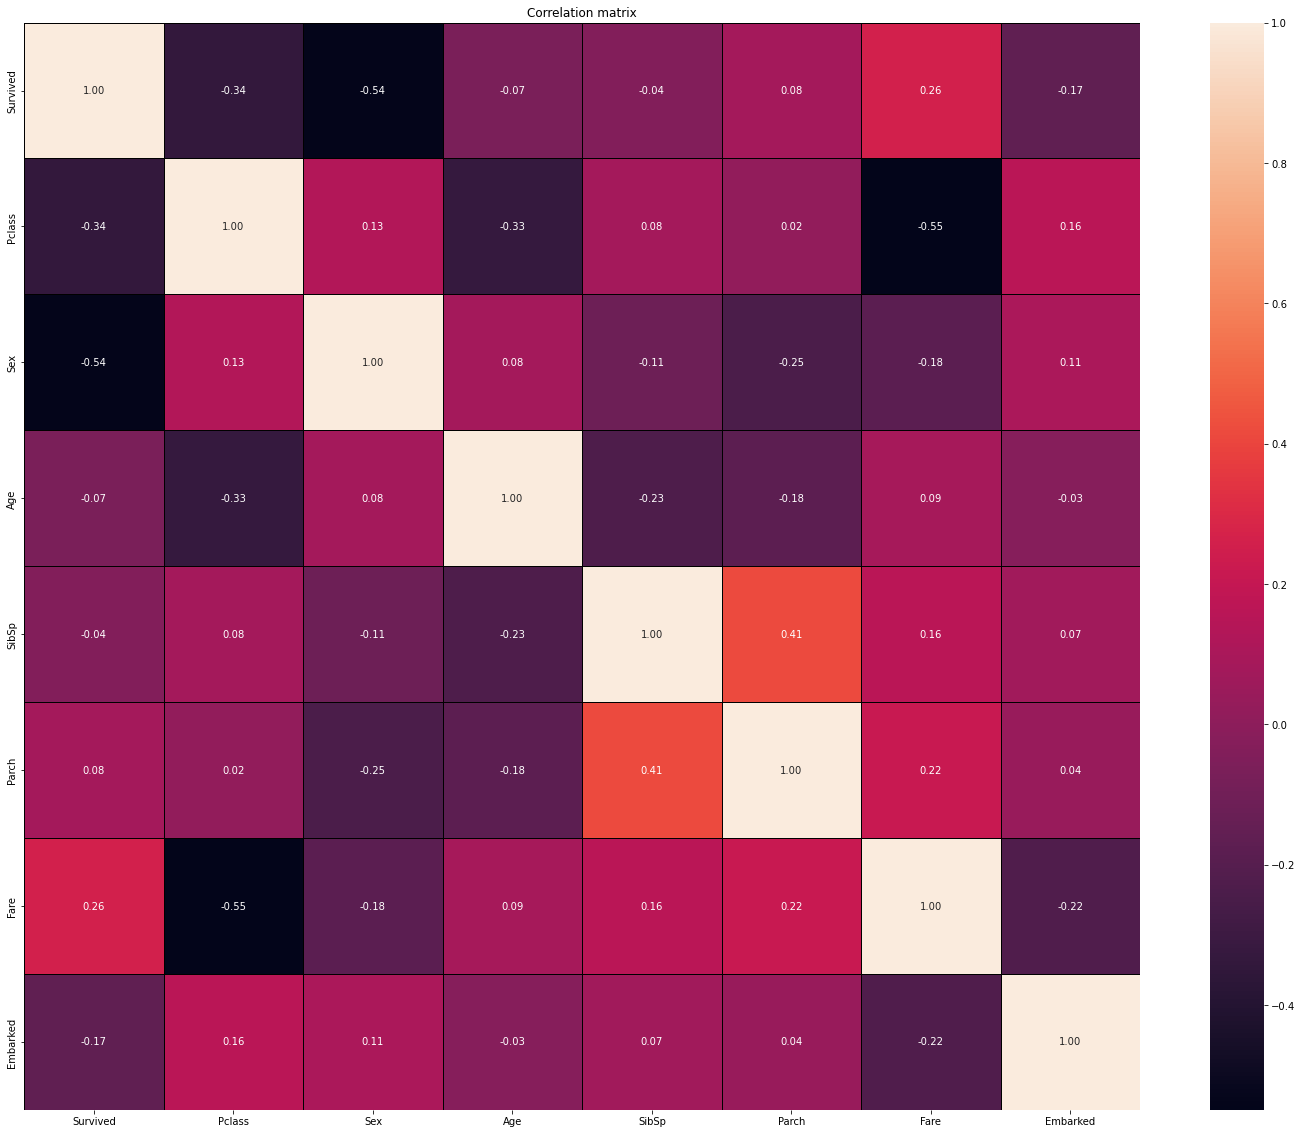

In [22]:
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor='black',fmt='.2f')
plt.title("Correlation matrix")
plt.savefig('Correlation matrix.jpg')
plt.show()

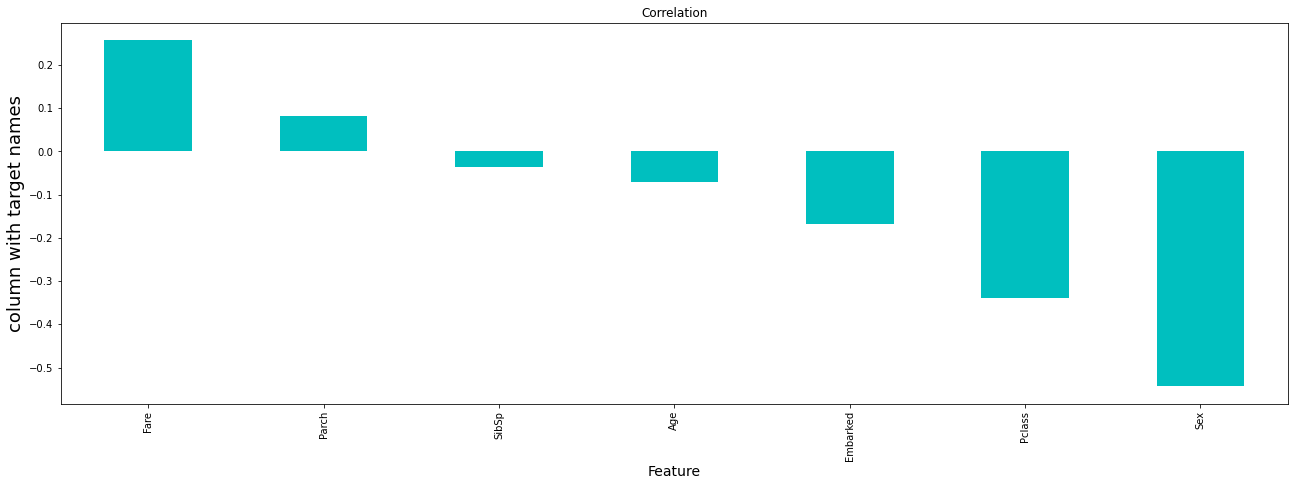

In [23]:
plt.figure(figsize=(22,7))
df.corr()['Survived'].sort_values(ascending=False).drop(['Survived']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=18)
plt.title('Correlation')
plt.show()


From above observation we can conclude that Sex is having highest relationship with target varibale(54%) and SibSp is having lowest relationship(4%)

# Checking for skewness

In [24]:
df.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.434488
SibSp       3.695352
Parch       2.749117
Fare        4.787317
Embarked   -1.264823
dtype: float64

Since we check skewnss of only continous columns so here fare is highly skewed

# Checking for outliers

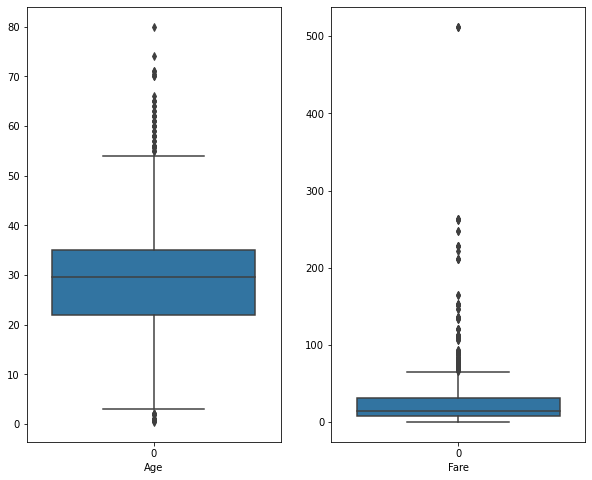

In [25]:
graph=1

plt.figure(figsize=(10,8))

continous_fea=df[['Age','Fare']]

for column in continous_fea:
    if graph<=2:
        plt.subplot(1,2,graph)
        ax=sns.boxplot(data=continous_fea[column])
        plt.xlabel(column)
    graph+=1
plt.show()

 We can see tha that both the columns having outliers

# Preprocessing

In [26]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,1.536476
std,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.791503
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


# Outlier Removal using Quantile Method

In [27]:
min_threshold,max_threshold=df.Age.quantile([0.1,0.99])
min_threshold,max_threshold

(16.0, 65.0)

In [28]:
df[df.Age<min_threshold]


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
7,0,3,1,2.00,3,1,21.0750,2
9,1,2,0,14.00,1,0,30.0708,0
10,1,3,0,4.00,1,1,16.7000,2
14,0,3,0,14.00,0,0,7.8542,2
16,0,3,1,2.00,4,1,29.1250,1
...,...,...,...,...,...,...,...,...
831,1,2,1,0.83,1,1,18.7500,2
850,0,3,1,4.00,4,2,31.2750,2
852,0,3,0,9.00,1,1,15.2458,0
869,1,3,1,4.00,1,1,11.1333,2


In [29]:
df[df.Age>min_threshold]


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,2
1,1,1,0,38.000000,1,0,71.2833,0
2,1,3,0,26.000000,0,0,7.9250,2
3,1,1,0,35.000000,1,0,53.1000,2
4,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2
887,1,1,0,19.000000,0,0,30.0000,2
888,0,3,0,29.699118,1,2,23.4500,2
889,1,1,1,26.000000,0,0,30.0000,0


In [30]:
df=df[(df.Age>min_threshold) & (df.Age<max_threshold)]
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,2
1,1,1,0,38.000000,1,0,71.2833,0
2,1,3,0,26.000000,0,0,7.9250,2
3,1,1,0,35.000000,1,0,53.1000,2
4,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2
887,1,1,0,19.000000,0,0,30.0000,2
888,0,3,0,29.699118,1,2,23.4500,2
889,1,1,1,26.000000,0,0,30.0000,0


In [31]:
# from scipy.stats import zscore
# z=np.abs(zscore(df))
# z.shape
# z

In [32]:
# threshold=3  # rule of thumb
# #index number
# print(np.where(z>3))
# len(np.where(z>3)[0])

In [33]:
# df_new=df[(z<3).all(axis=1)]
# print("old dataframe",df.shape)
# print("new dataframe",df_new.shape)
# print("total number of rows dropped",df.shape[0]-df_new.shape[0])

<!-- ### Percentage data loss -->

In [34]:
# loss_percent=(891-820)/891*100
# loss_percent

## Separating label and features as x and y

In [35]:
x=df.drop(columns=['Survived'],axis=1)

In [36]:
y=df['Survived']

# Removing skewness using data transforamtion

In [37]:
from sklearn.preprocessing import power_transform

In [38]:
x=power_transform(df,method='yeo-johnson')
x

array([[-0.76088591,  0.88589965,  0.71733054, ..., -0.45337816,
        -0.81399692,  0.6095117 ],
       [ 1.31425748, -1.42524295, -1.39405747, ..., -0.45337816,
         1.33187707, -1.78405207],
       [ 1.31425748,  0.88589965, -1.39405747, ..., -0.45337816,
        -0.72716889,  0.6095117 ],
       ...,
       [-0.76088591,  0.88589965, -1.39405747, ...,  2.22548703,
         0.32277728,  0.6095117 ],
       [ 1.31425748, -1.42524295,  0.71733054, ..., -0.45337816,
         0.55392297, -1.78405207],
       [-0.76088591,  0.88589965,  0.71733054, ..., -0.45337816,
        -0.74896328, -1.24282378]])

In [39]:
#Mow Checking skewness again for continous columns

In [40]:
x_new=pd.DataFrame(x)

In [41]:
x_new

,0,1,2,3,4,5,6,7
0,-0.760886,0.885900,0.717331,-1.119002,1.579646,-0.453378,-0.813997,0.609512
1,1.314257,-1.425243,-1.394057,0.769344,1.579646,-0.453378,1.331877,-1.784052
2,1.314257,0.885900,-1.394057,-0.503319,-0.620459,-0.453378,-0.727169,0.609512
3,1.314257,-1.425243,-1.394057,0.507888,1.579646,-0.453378,1.073559,0.609512
4,-0.760886,0.885900,0.717331,0.507888,-0.620459,-0.453378,-0.711889,0.609512
...,...,...,...,...,...,...,...,...
775,-0.760886,-0.520697,0.717331,-0.369033,-0.620459,-0.453378,-0.244022,0.609512
776,1.314257,-1.425243,-1.394057,-1.688507,-0.620459,-0.453378,0.553923,0.609512
777,-0.760886,0.885900,-1.394057,-0.037736,1.579646,2.225487,0.322777,0.609512
778,1.314257,-1.425243,0.717331,-0.503319,-0.620459,-0.453378,0.553923,-1.784052


In [42]:
x_new.skew()

0    0.554438
1   -0.403373
2   -0.678032
3    0.012539
4    0.995997
5    1.755825
6   -0.045122
7   -1.067972
dtype: float64

We can see that skewness is removed

# Data Standardisation

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
scaler=StandardScaler()

In [45]:
x_scaled=scaler.fit_transform(x_new)

# Checking for multicollinearity

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [47]:
vif=pd.DataFrame()
vif['vif1']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif['features']=x_new.columns
vif

,vif1,features
0,1.719701,0
1,1.976765,1
2,1.641573,2
3,1.107464,3
4,1.300762,4
5,1.284306,5
6,2.319773,6
7,1.060587,7


We can see that Variance Inflation Factor(VIF) for all columns are less than 5.So there is no multicollinearity

# Training our model

## Logistic Regression Classifier

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score,roc_curve

In [49]:
lr=LogisticRegression()

## Finding the best random state

In [50]:
max_acc=0
max_rs=0

for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,random_state=i,test_size=0.20)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    pred_rf=lr.predict(x_test)
    accuracy=accuracy_score(y_test,pred_rf)
    print('Testing accuracy', accuracy,'random state',i)
    
    if accuracy>max_acc:
        max_acc=accuracy
        max_rs=i
        print('max_accuracy',max_acc,'max_random_state',i)
        

Testing accuracy 1.0 random state 0
max_accuracy 1.0 max_random_state 0
Testing accuracy 1.0 random state 1
Testing accuracy 1.0 random state 2
Testing accuracy 1.0 random state 3
Testing accuracy 1.0 random state 4
Testing accuracy 1.0 random state 5
Testing accuracy 1.0 random state 6
Testing accuracy 1.0 random state 7
Testing accuracy 1.0 random state 8
Testing accuracy 1.0 random state 9
Testing accuracy 1.0 random state 10
Testing accuracy 1.0 random state 11
Testing accuracy 1.0 random state 12
Testing accuracy 1.0 random state 13
Testing accuracy 1.0 random state 14
Testing accuracy 1.0 random state 15
Testing accuracy 1.0 random state 16
Testing accuracy 1.0 random state 17
Testing accuracy 1.0 random state 18
Testing accuracy 1.0 random state 19
Testing accuracy 1.0 random state 20
Testing accuracy 1.0 random state 21
Testing accuracy 1.0 random state 22
Testing accuracy 1.0 random state 23
Testing accuracy 1.0 random state 24
Testing accuracy 1.0 random state 25
Testing accu

We found that test accuracy is same for all random state

## Using Train Test Split

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,random_state=41,test_size=0.20)

In [52]:
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)
        print(f"Accuracy score in training:{accuracy_score(y_train,y_pred)*100:2f}%")
        
    elif train==False:
        pred=clf.predict(x_test)
        print(f"Accuracy score in testing:{accuracy_score(y_test,pred)*100:2f}%")
        
        print("Classification report\n",classification_report(y_test,pred,digits=2))

In [53]:
lr=LogisticRegression()

In [54]:
lr.fit(x_train,y_train)

LogisticRegression()

In [55]:
metric_score(lr,x_train,x_test,y_train,y_test,train=True)

Accuracy score in training:100.000000%


In [56]:
metric_score(lr,x_train,x_test,y_train,y_test,train=False)

Accuracy score in testing:100.000000%
Classification report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        94
           1       1.00      1.00      1.00        62

    accuracy                           1.00       156
   macro avg       1.00      1.00      1.00       156
weighted avg       1.00      1.00      1.00       156



## Finding best Cross validation score for logistic regression:

In [57]:
pred_lr=lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lss=accuracy_score(y_test,pred_lr)
for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_score_mean=cv_score.mean()
    print("cv at ", j)
    print("Cross validation score is :-", cv_score_mean*100)
    print()

cv at  2
Cross validation score is :- 100.0

cv at  3
Cross validation score is :- 100.0

cv at  4
Cross validation score is :- 100.0

cv at  5
Cross validation score is :- 100.0

cv at  6
Cross validation score is :- 100.0

cv at  7
Cross validation score is :- 100.0

cv at  8
Cross validation score is :- 100.0

cv at  9
Cross validation score is :- 100.0



Since we getting maximum accuracy at all cv value so we will choose cv=3

In [58]:
lssscore_selected=cross_val_score(lr,x,y,cv=3).mean()
print("the cv score is ",lssscore_selected)

the cv score is  1.0


### No need of hyperparameter tuning is required s we got the highest testing accurcy

# Using Random Forest Classifier

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
rf=RandomForestClassifier()

In [61]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [62]:
metric_score(rf,x_train,x_test,y_train,y_test,train=True)

Accuracy score in training:100.000000%


In [63]:
metric_score(rf,x_train,x_test,y_train,y_test,train=False)

Accuracy score in testing:100.000000%
Classification report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        94
           1       1.00      1.00      1.00        62

    accuracy                           1.00       156
   macro avg       1.00      1.00      1.00       156
weighted avg       1.00      1.00      1.00       156



In [64]:
lssscore_selected=cross_val_score(rf,x,y,cv=3).mean()
print("the cv score is ",lssscore_selected)

the cv score is  1.0


### No need of hyperparameter tuning is required s we got the highest testing accurcy

# Saving the model

In [68]:
import pickle

In [70]:
pickle.dump(lr,open('classification_model','wb'))